# Titel

Gruppe: Gaia Capoferri, Dana Schnekenburger, Katarina Djuric

Fragen
- Welche Länder hatten in den letzten 50 Jahren die grösste Zunahme der Schuljahre?
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/mean-years-of-schooling-long-run?tab=chart

## 1. Daten beschaffen und laden

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# loading the data
df_orig = pd.read_csv('mean-years-of-schooling-long-run/mean-years-of-schooling-long-run.csv', skiprows=1,
                 names=['Entity','Code','Year','Combined-average years of education for 15-64 years male and female youth and adults'])
df_orig.head() 

,Entity,Code,Year,Combined-average years of education for 15-64 years male and female youth and adults
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge von 5 Jahren.

In [3]:
df_pivot = df_orig.pivot(index='Entity', columns='Year', values='Combined-average years of education for 15-64 years male and female youth and adults')
df_pivot.head()

Year,1870,1875,1880,1885,1890,1895,1900,1905,1910,1915,...,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.01000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,...,2.400000,3.030000,3.320000,3.930000,4.810000,5.690000,6.26000,6.840000,7.380000,7.920000
Africa,0.05829,0.06893,0.084427,0.103117,0.120366,0.130437,0.148879,0.183318,0.233323,0.323424,...,4.708579,5.012495,5.446501,5.890455,6.195438,6.681866,7.18392,7.733528,8.256504,8.776776
Albania,0.02000,0.03000,0.030000,0.040000,0.050000,0.060000,0.080000,0.100000,0.150000,0.240000,...,8.540000,9.930000,10.240000,10.440000,9.990000,10.320000,10.58000,10.830000,11.100000,11.390000
Algeria,0.10000,0.13000,0.160000,0.200000,0.230000,0.270000,0.390000,0.510000,0.600000,0.580000,...,5.760000,6.060000,6.430000,7.000000,7.550000,8.180000,8.77000,9.370000,10.030000,10.590000
Argentina,0.39000,0.49000,0.590000,0.650000,0.700000,0.830000,0.970000,1.450000,1.810000,2.350000,...,8.910000,9.080000,9.570000,9.710000,9.590000,9.860000,10.13000,10.390000,10.640000,10.870000


## 3. Statistik der Roh-Daten (Analyse in Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* enthält 146 verschieden Entity 
- Die Spalte *Codes* enthält 146 verschiedene Codes
- Die Daten zwischen 1870 und 2040 sind vorhanden. Wir untersuchen nur von 1970 bis 2020
- Die Combined-average years of education for 15-64 years male and female youth and adults streut zwischen 1 und 1374

In [4]:
df_orig.dtypes

Entity                                                                                   object
Code                                                                                     object
Year                                                                                      int64
Combined-average years of education for 15-64 years male and female youth and adults    float64
dtype: object

### 3.1 Analyse Entity

In [18]:
drop_entities = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "World"]
drop_years = ["1870", "1875", "1880", "1885", "1890", "1895", "1900", "1905", "1910", "1915", "1920", "1925", "1930", "1935", "1940", "1945", "1950", "1955", "1960", "1965"]
df_analyse = df_orig[~df_orig["Entity"].isin(drop_entities)]
df_analyse = df_analyse[~df_analyse["Year"].isin(drop_years)]

In [19]:
print('Anzahl verschiedener Entities: ', len(df_analyse['Code'].unique()))

Anzahl verschiedener Entities:  146


In [20]:
# Anzahl Datenpunkte pro Entity
df_analyse['Entity'].value_counts()

Entity
Afghanistan                 35
Italy                       35
Peru                        35
Paraguay                    35
Panama                      35
                            ..
Slovenia                     6
Central African Republic     6
Estonia                      6
Lithuania                    6
Israel                       6
Name: count, Length: 146, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Entity'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

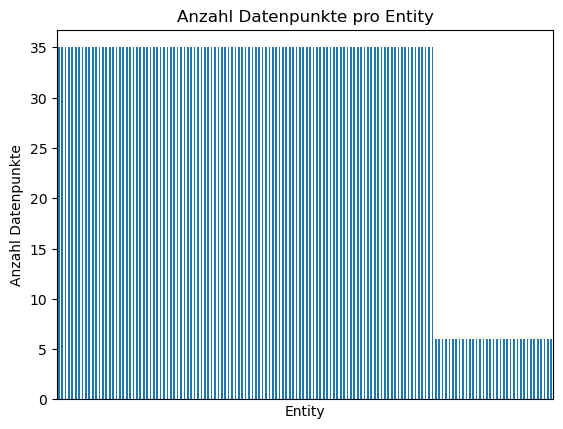

In [21]:
df_analyse['Entity'].value_counts().plot(kind='bar',
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Entity')

### 3.2 Analyse Year

In [22]:
print('Anzahl verschiedener Years: ', len(df_analyse['Year'].unique()))

Anzahl verschiedener Years:  35


In [23]:
# Anzahl Datenpunkte pro Year
df_analyse['Year'].value_counts().sort_index()

Year
1870    111
1875    111
1880    111
1885    111
1890    111
1895    111
1900    111
1905    111
1910    111
1915    111
1920    111
1925    111
1930    111
1935    111
1940    111
1945    111
1950    111
1955    111
1960    111
1965    111
1970    111
1975    111
1980    111
1985    111
1990    111
1995    111
2000    111
2005    111
2010    111
2015    146
2020    146
2025    146
2030    146
2035    146
2040    146
Name: count, dtype: int64

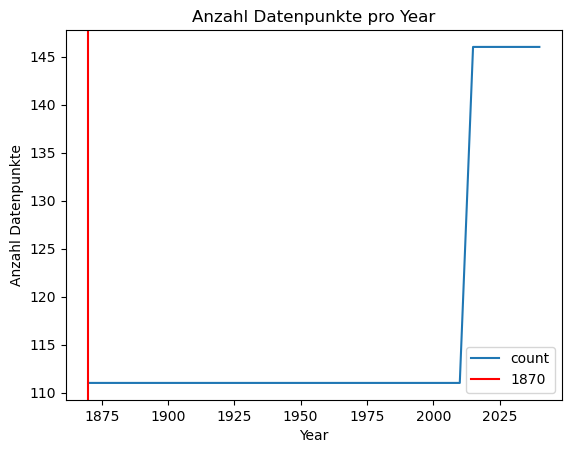

In [24]:
# Years mit maximaler Anzahl Datenpunkte (153)
g = df_analyse['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Year');
g.axvline(x=1870, color='red', label='1870') # rote Linie bei 1870 - ab hier sind alle Years enthalten
g.legend()  # Legende anzeigen

### 3.3 Analyse Combined-average years of education for 15-64 years male and female youth and adults

In [25]:
df_analyse.describe()

,Year,Combined-average years of education for 15-64 years male and female youth and adults
count,4095.000000,4095.000000
mean,1958.717949,4.709060
std,51.762462,4.145841
min,1870.000000,0.000000
25%,1915.000000,0.760000
50%,1960.000000,3.710000
75%,2005.000000,8.165000
max,2040.000000,15.480000


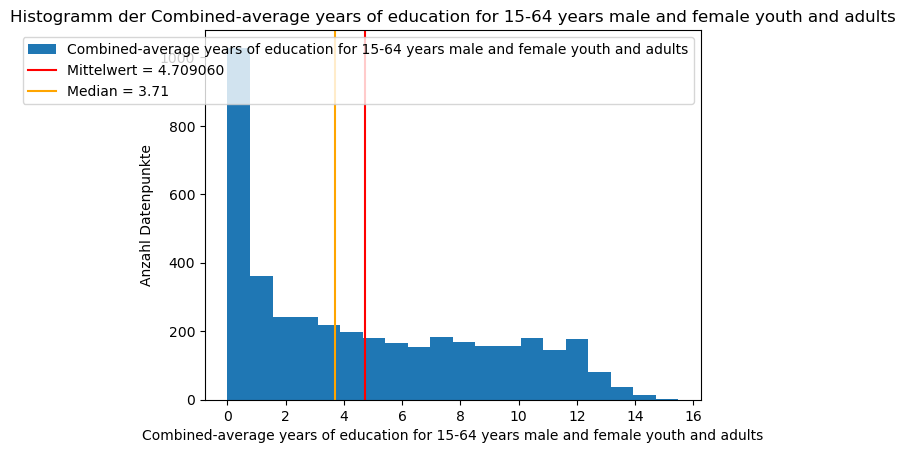

In [26]:
g = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].plot(kind='hist', bins=20, title='Histogramm der Combined-average years of education for 15-64 years male and female youth and adults',
                                                                                                    xlabel='Combined-average years of education for 15-64 years male and female youth and adults', ylabel='Anzahl Datenpunkte')
mean = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].mean()
g.axvline(x=df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].mean(), color='red',label=f'Mittelwert = {mean:2f}')  # rote Linie bei Mittelwert

median = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].median()
g.axvline(x=df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen
- 